In [97]:
import numpy as np
%matplotlib inline

Let's have a look at Ayoub's code. I have changed the value of $m$ from $10000$ (which broke my computer) to $1000$.

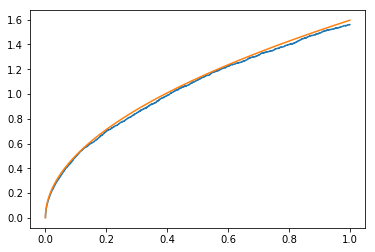

In [115]:
def sign(x):
    return 2*(x>=0)-1
    
N=10000
m=1000

Res=[]
for i in range(m):
    dW = np.random.normal(0,1,N+1)/np.sqrt(N)
    #starting from 0    
    #dW[0]=0
    W = np.cumsum(dW)
    Res.append(np.cumsum(sign(W)*dW))
Res=np.array(Res)
Res = np.mean(Res,axis=0)
X=np.arange(N+1)/N
plt.plot(X,Res)
plt.plot(X,2*np.sqrt(X*2/np.pi))
plt.show()

In fact, with just ONE simulation, you can see that you get a process that's positive everywhere, so it definitely can't be a Brownian:

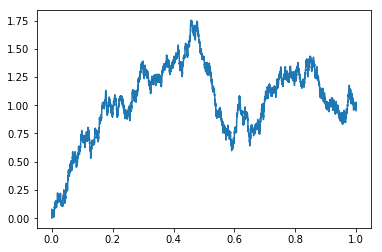

In [119]:
dW = np.random.normal(0,1,N+1)/np.sqrt(N)
W = np.cumsum(dW)
plt.plot(X,np.cumsum(sign(W)*dW))

All this would likely imply that the process $I_t=\int _{0}^t \rm{sign}(B_s)dB_s$ is not a Brownian motion.
But actually IT IS. It is a consequence of Levy's characterization of the Brownian motion, as you see by computing the quadratic variation $<I_t>=\int_0^t \rm{sign}(B_s)^2.ds  = \int_0^t 1.ds = t$.

Therefore the problem must come from the simulation. It certainly isn't a problem of discretization because $N=10000$ is more than enough, especially with $10000$ simulations.
The problem comes from the fact that the discretization should be $\sum_{i} \rm{sign}B_{t_i}(B_{t_{i+1}}-B_{t_i})$, but instead what you have is $\sum_{i} \rm{sign}B_{t_i}(B_{t_{i}}-B_{t_{i-1}})$, so your increment $dB_s$ is not independent from the integrand.


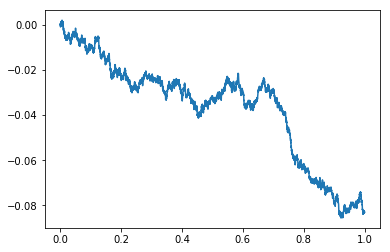

In [129]:
N,m=(10000,1000)
dW = (np.random.normal(0,1,(N+1)*m)/np.sqrt(N)).reshape((m,N+1))
W = np.cumsum(dW,axis=1)
Res=np.cumsum(np.sign(W)[:,:-1]*dW[:,1:],axis=1)
plt.plot(X[:-1],np.mean(Res,axis=0))

This is quite reminiscent of a Brownian, isn't it?